In [1]:
import numpy as np
import sys
sys.path.append('../main/')
from multi_py.multi import *
# from multi_py.atmos import atmos
import matplotlib.pyplot as plt
import copy
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import scipy.ndimage as ndi
plt.style.use('../main/multi_py/Bergemann2020.mplstyle')

In [2]:
# test_atmos = atmos(parent='../runs/SiStagNLTE_30_f3Dold/', file='multi3d.input')

In [3]:
major_krs = [286, 291, 293, 299, 427]
run_3DNLTE = m3d('../runs/SiStagNLTE_30_f3Dold/output/', lines=major_krs, conts=[], ratmos=True)
run_1DNLTE = m3d('../runs/SiMarcs1DNLTE/output/', lines=major_krs, conts=[], ratmos=True)

Completed reading parameters from ../runs/SiMarcs1DNLTE/output//


In [4]:
atmo_3DNLTE = run_3DNLTE.atmos
atmo_1DNLTE = run_1DNLTE.atmos

In [5]:
# Geometric spacing of gridpoints:
dz_1D = np.abs((run_1DNLTE.widthz[0] - run_1DNLTE.widthz[-1])/(run_1DNLTE.nz - 1))
dy_1D = dx_1D  = np.abs((run_1DNLTE.widthx[0] - run_1DNLTE.widthx[-1])/(run_1DNLTE.nx - 1))


Text(0.5, 1.0, '1DNLTE')

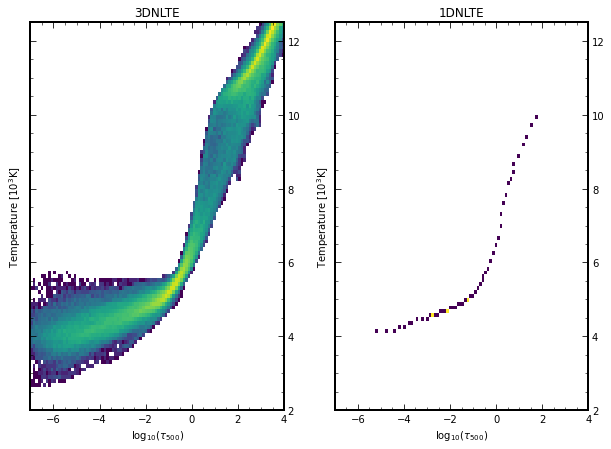

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,7), sharey='row')
atmo_3DNLTE.hist2d(ax=ax[0]);
ax[0].set_title('3DNLTE')
atmo_1DNLTE.hist2d(ax=ax[1]);
ax[1].set_title('1DNLTE')

Text(0.5, 1.0, '1DNLTE')

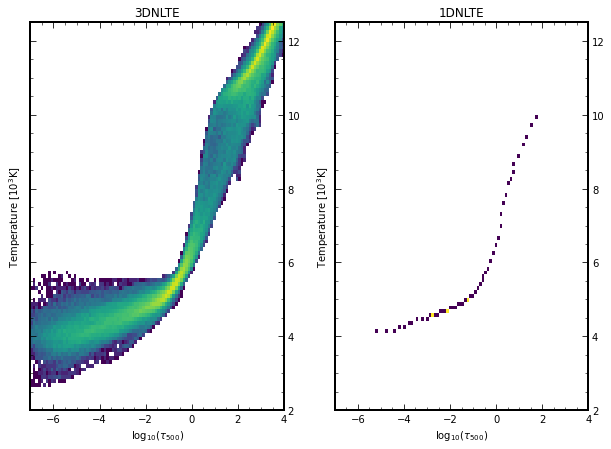

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,7), sharey='row')
atmo_3DNLTE.hist2d(ax=ax[0]);
ax[0].set_title('3DNLTE')
atmo_1DNLTE.hist2d(ax=ax[1]);
ax[1].set_title('1DNLTE')

In [8]:
np.shape(atmo_3DNLTE.tau)

(30, 30, 230)

In [9]:
def cart2sph(x, y, z):
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    el = np.arctan2(z, hxy)
    az = np.arctan2(y, x)
    return az, el, r

In [10]:
atmo_1DNLTE.cart = [i for i in np.ndindex(np.shape(atmo_1DNLTE.temp))]

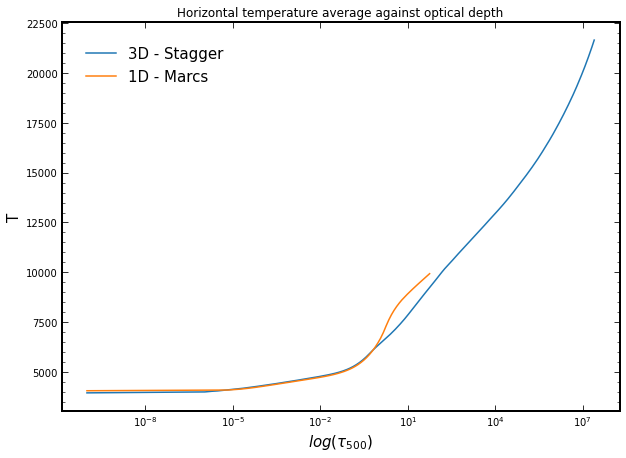

In [11]:
fig, ax = plt.subplots(1, figsize=(10,7), sharey='row')
ax.semilogx(atmo_3DNLTE.hav('tau'), atmo_3DNLTE.hav('temp'), label='3D - Stagger')
ax.semilogx(atmo_1DNLTE.hav('tau'), atmo_1DNLTE.hav('temp'), label='1D - Marcs')
ax.set_xlabel(r'$log(\tau_{500})$', fontsize=15)
ax.set_ylabel('T', fontsize=15)
ax.set_title('Horizontal temperature average against optical depth')
ax.legend(fontsize=15)

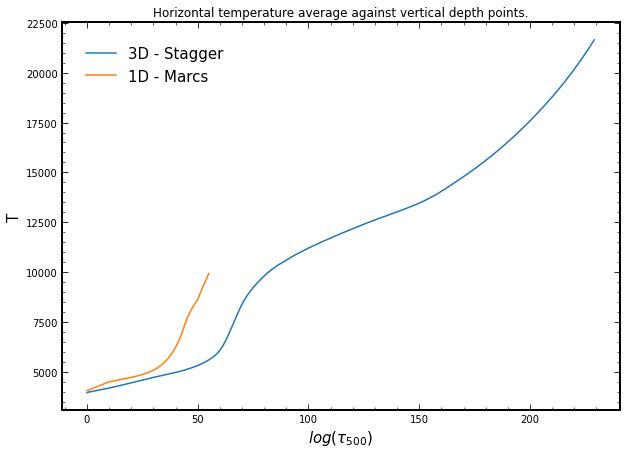

In [12]:
fig, ax = plt.subplots(1, figsize=(10,7), sharey='row')
ax.plot(atmo_3DNLTE.hav('temp'), label='3D - Stagger')
ax.plot(atmo_1DNLTE.hav('temp'), label='1D - Marcs')
ax.set_xlabel(r'$log(\tau_{500})$', fontsize=15)
ax.set_ylabel('T', fontsize=15)
ax.set_title('Horizontal temperature average against vertical depth points.')
ax.legend(fontsize=15)

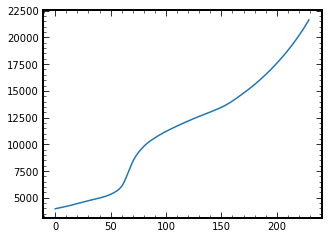

In [13]:
plt.plot(atmo_3DNLTE.hav('temp'))

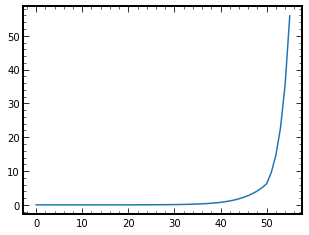

In [14]:
plt.plot(atmo_1DNLTE.hav('tau'))

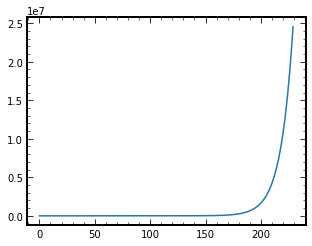

In [15]:
plt.plot(atmo_3DNLTE.hav('tau'))

In [16]:
phi = np.pi/2
def f(x, y):
    return np.abs(x*np.cos(phi))

x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [17]:
print(f(x,y))

[0.00000000e+00 6.80359333e-18 1.36071867e-17 2.04107800e-17
 2.72143733e-17 3.40179666e-17 4.08215600e-17 4.76251533e-17
 5.44287466e-17 6.12323400e-17]


/tmp/ipykernel_35120/3229922665.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


(0.0, 5.0)

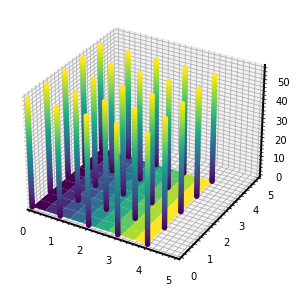

In [18]:
# %matplotlib widget
fig = plt.figure()
ax = Axes3D(fig)
data = atmo_1DNLTE.temp
x, y, z = data.nonzero()
ax.scatter(x, y, z, c=z, alpha=1)
ax.plot_surface(X*4, Y*4, Z*55, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_zlim(0,56)
ax.set_xlim(0,5)
ax.set_ylim(0,5)



In [19]:
4*np.tan(np.pi/3)

6.928203230275507

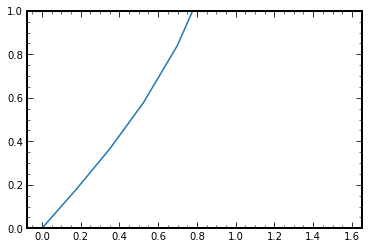

In [20]:
%matplotlib inline
x = np.linspace(0,np.pi/2, 10)
plt.plot(x, np.tan(x))
plt.ylim(0,1)
plt.show()

In [21]:
# fig = plt.figure(figsize=(10,10))
# ax= fig.add_subplot(111, projection='3d')
# data = atmo_3DNLTE.tau
# x, y, z = data.nonzero()
# ax.scatter(x, y, z, c=z, alpha=1)

## map coords

In [22]:
def intp_plane(dx, dy, dz, atmosobject, runobject):
    x_max = np.max(runobject.widthz)
    scaling = np.array([dx, dy, dz])
    data = atmosobject.temp
    u = np.array([0, 1 ,0])
    v = np.array([1, 0, 0.203])
    coords = (u[:, None, None] * np.linspace(0, x_max, 20)[None, :, None] +
          v[:, None, None] * np.linspace(0, (x_max)/np.cos(0.201), 20)[None, None, :])
    idx = coords / scaling[(slice(None),) + (None,)*(coords.ndim-1)]
    print(data.shape, coords.shape)
    new_data = ndi.map_coordinates(data, idx)
    return new_data


In [23]:
new_plane = intp_plane(dx_1D, dy_1D, dz_1D, atmo_1DNLTE, runobject=run_1DNLTE)

(5, 5, 56) (3, 20, 20)


In [24]:
np.array([dx_1D, dy_1D, dz_1D])

array([1000000.        , 1000000.        , 1484545.45454545])

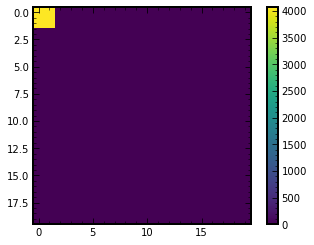

In [25]:
im=plt.imshow(new_plane)
plt.colorbar(im)

In [26]:
# new_data = new_data[new_data>0]
# plt.imshow(new_data)

In [27]:
# new_data_row = new_data[0]
# plt.plot(new_data_row[new_data_row>0])

In [28]:
# clean_data = new_data[~np.all(new_data == 0, axis=1)]
# clean_data = new_data[~np.all(clean_data == 0, axis=0)]


In [29]:
run_3DNLTE.widthx[0] - run_3DNLTE.widthx[-1]

-796666688.0

In [30]:
np.tan(0.201)*(run_3DNLTE.widthx[0] - run_3DNLTE.widthx[-1])

-162321903.85647488

## Averaged y temps

In [57]:
def temp_path(runobject):
    atmosobject = runobject.atmos
    # (ave) grid separation
    dz = np.abs((runobject.widthz[0] - runobject.widthz[-1])/(runobject.nz - 1))
    dy = dx  = np.abs((runobject.widthx[0] - runobject.widthx[-1])/(runobject.nx - 1))

    y_mean_temp = np.mean(atmosobject.temp, axis=1)
    y_mean_tau500 = np.mean(atmosobject.tau, axis=1)
    y_mean_rho = np.mean(atmosobject.rho, axis=1)
    
    xx = np.linspace(0,atmosobject.nx-1,50)
    h = (xx*dx)/(np.cos(0.201))
    zz = xx*(dx/dz)*np.tan(0.201)
    zz_array = zz

    h_array = copy.deepcopy(h)

    i=1
    while np.max(zz+zz[-1]*i) < atmosobject.nz-1:
            zz_array = np.vstack([zz_array,zz+zz[-1]*i])
            h_array = np.vstack([h_array, h+h[-1]*i])
            i+=1


    tt_array = np.zeros(zz_array.shape)
    od_array = np.zeros(zz_array.shape)
    rho_array = np.zeros(zz_array.shape)
    z_real = np.zeros(zz_array.shape)
    for s, thiszz in enumerate(zz_array):
        grid_coords = np.column_stack((xx,thiszz))
        # Interpolate the temperature, optical depth, and density at these grid points
        tt_array[s] = ndi.map_coordinates(y_mean_temp, grid_coords.T)
        od_array[s] = ndi.map_coordinates(y_mean_tau500, grid_coords.T)
        rho_array[s] = ndi.map_coordinates(y_mean_rho, grid_coords.T)
        z_real[s] = thiszz*dz

    # path distance from bottom of cube for mu = 1 for each grid point
    ray_dist_mu1 = runobject.widthz - runobject.widthz[-1]
    ray_dist_mu1 = ray_dist_mu1[::-1]
    # print(z_real)
    # print(runobject.widthz[0] - runobject.widthz[-1])
    # print(np.shape(tt_array))

    return h_array, tt_array, od_array, rho_array, ray_dist_mu1, atmosobject.hav('temp'), atmosobject.hav('tau'), atmosobject.hav('rho')

In [59]:
h_array_1D, tt_array_1D, od_array_1D, rho_array_1D, ray_dist_mu1_1D,  temp_hav_1D, od_hav_1D, rho_hav_1D = temp_path(run_1DNLTE)

In [60]:
h_array_3D, tt_array_3D, od_array_3D, rho_array_3D, ray_dist_mu1_3D, temp_hav_3D, od_hav_3D, rho_hav_3D = temp_path(run_3DNLTE)

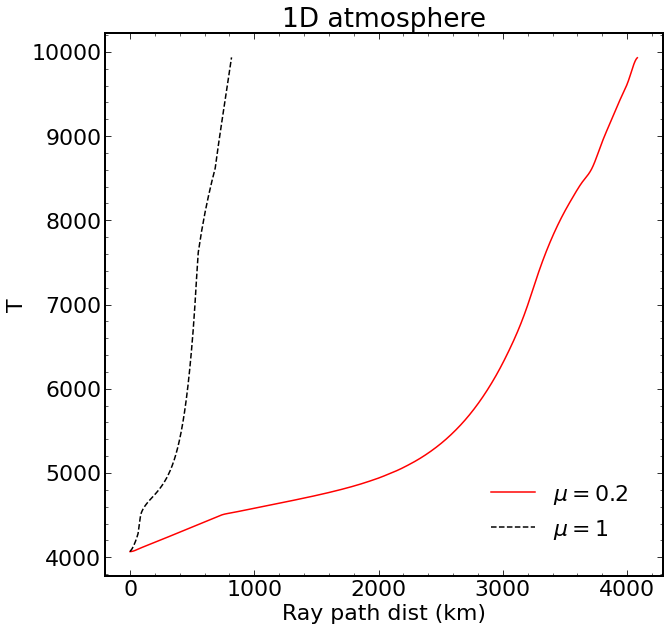

In [61]:
matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(1, figsize=(10,10))
ax.plot(h_array_1D.ravel()* 1e-5, tt_array_1D.ravel(), label='$\mu = 0.2$', color='r')
ax.plot(ray_dist_mu1_1D * 1e-5,temp_hav_1D, label='$\mu = 1$', color='k' , linestyle='--')
ax.set_ylabel('T')
ax.set_xlabel('Ray path dist (km)')
ax.set_title('1D atmosphere')
ax.legend()
# fig.savefig('../plots/1D_temp_raydist.png')

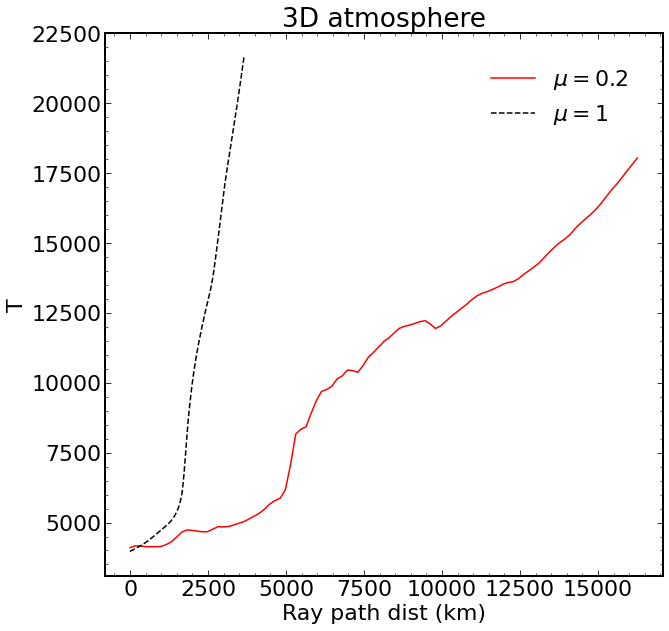

In [62]:
matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(1, figsize=(10,10))
ax.plot(h_array_3D.ravel()* 1e-5, tt_array_3D.ravel(), label='$\mu = 0.2$', color='r')
ax.plot(ray_dist_mu1_3D * 1e-5,temp_hav_3D,  label='$\mu = 1$', color='k' , linestyle='--')
ax.set_ylabel('T')
ax.set_xlabel('Ray path dist (km)')
ax.set_title('3D atmosphere')

ax.legend()
# fig.savefig('../plots/3D_temp_raydist.png')

## Plot per mu angle

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

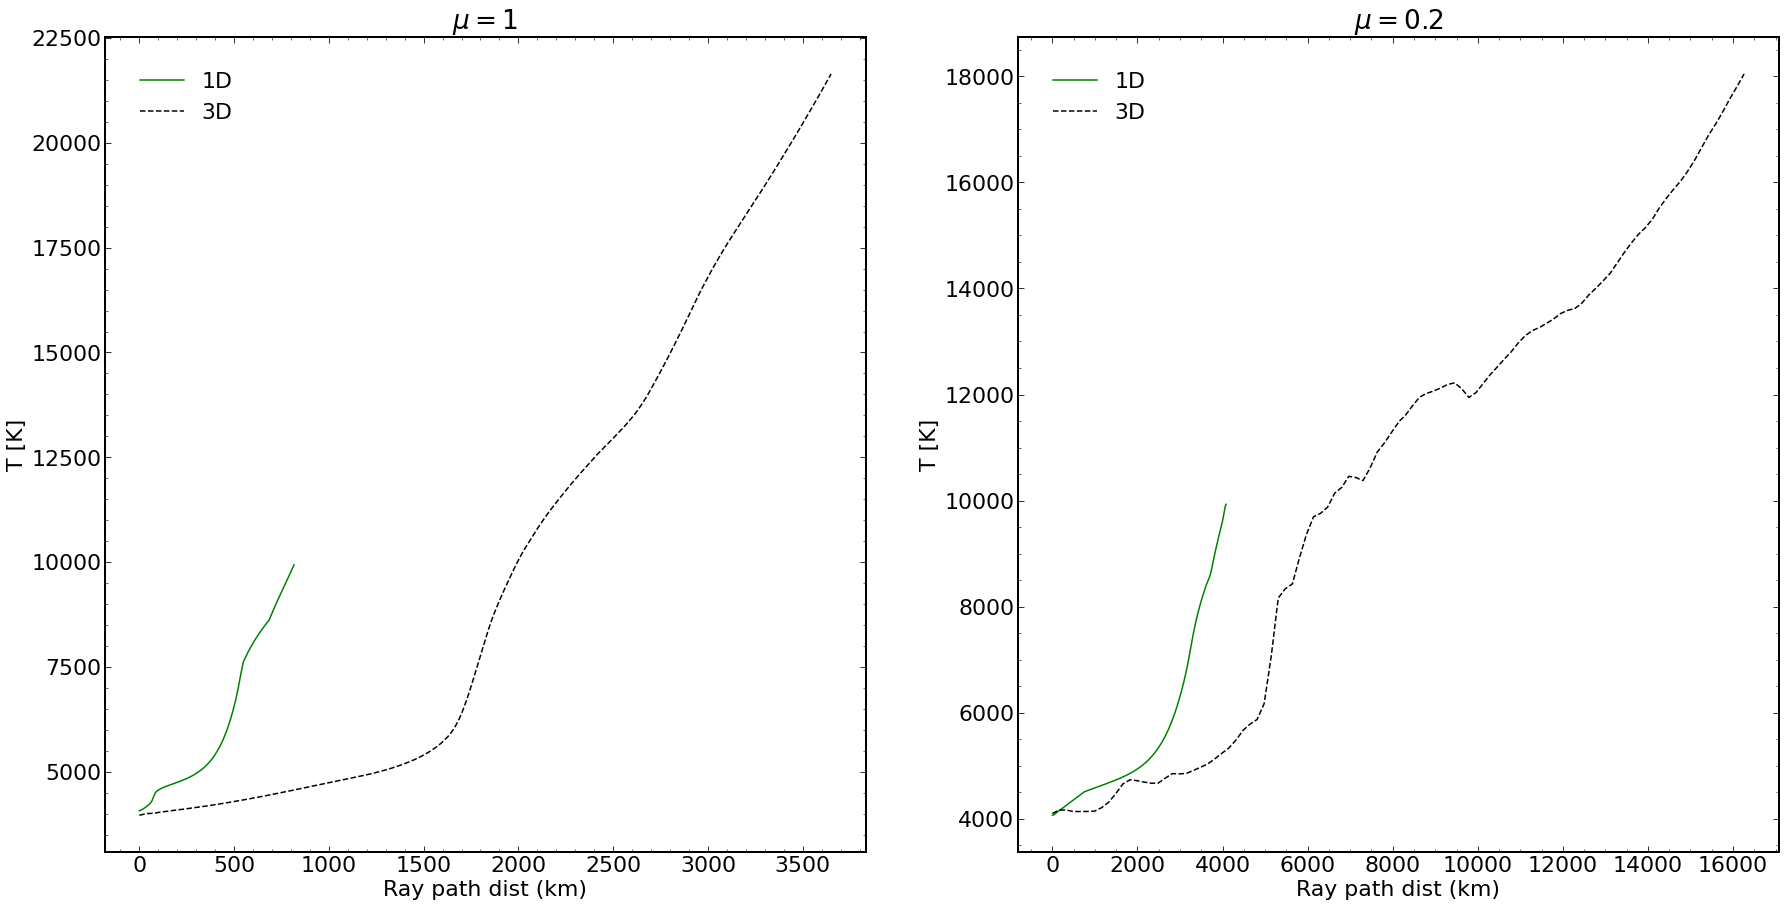

In [63]:
fig, ax = plt.subplots(1,2 , figsize=(30,15))
ax[0].plot(ray_dist_mu1_1D * 1e-5 ,temp_hav_1D, label='1D', color='g' , linestyle='-')
ax[0].plot(ray_dist_mu1_3D * 1e-5 ,temp_hav_3D,  label='3D', color='k' , linestyle='--')
ax[0].set_ylabel('T [K]')
ax[0].set_xlabel('Ray path dist (km)')
ax[0].set_title('$\mu = 1$')
ax[0].legend()

ax[1].plot(h_array_1D.ravel() * 1e-5 ,tt_array_1D.ravel(), label='1D', color='g' , linestyle='-')
ax[1].plot(h_array_3D.ravel() * 1e-5 ,tt_array_3D.ravel(),  label='3D', color='k' , linestyle='--')
ax[1].set_ylabel('T [K]')
ax[1].set_xlabel('Ray path dist (km)')
ax[1].set_title('$\mu = 0.2$')
ax[1].legend()

plt.tight_layout


In [64]:
od_array_3D.ravel().shape

(100,)

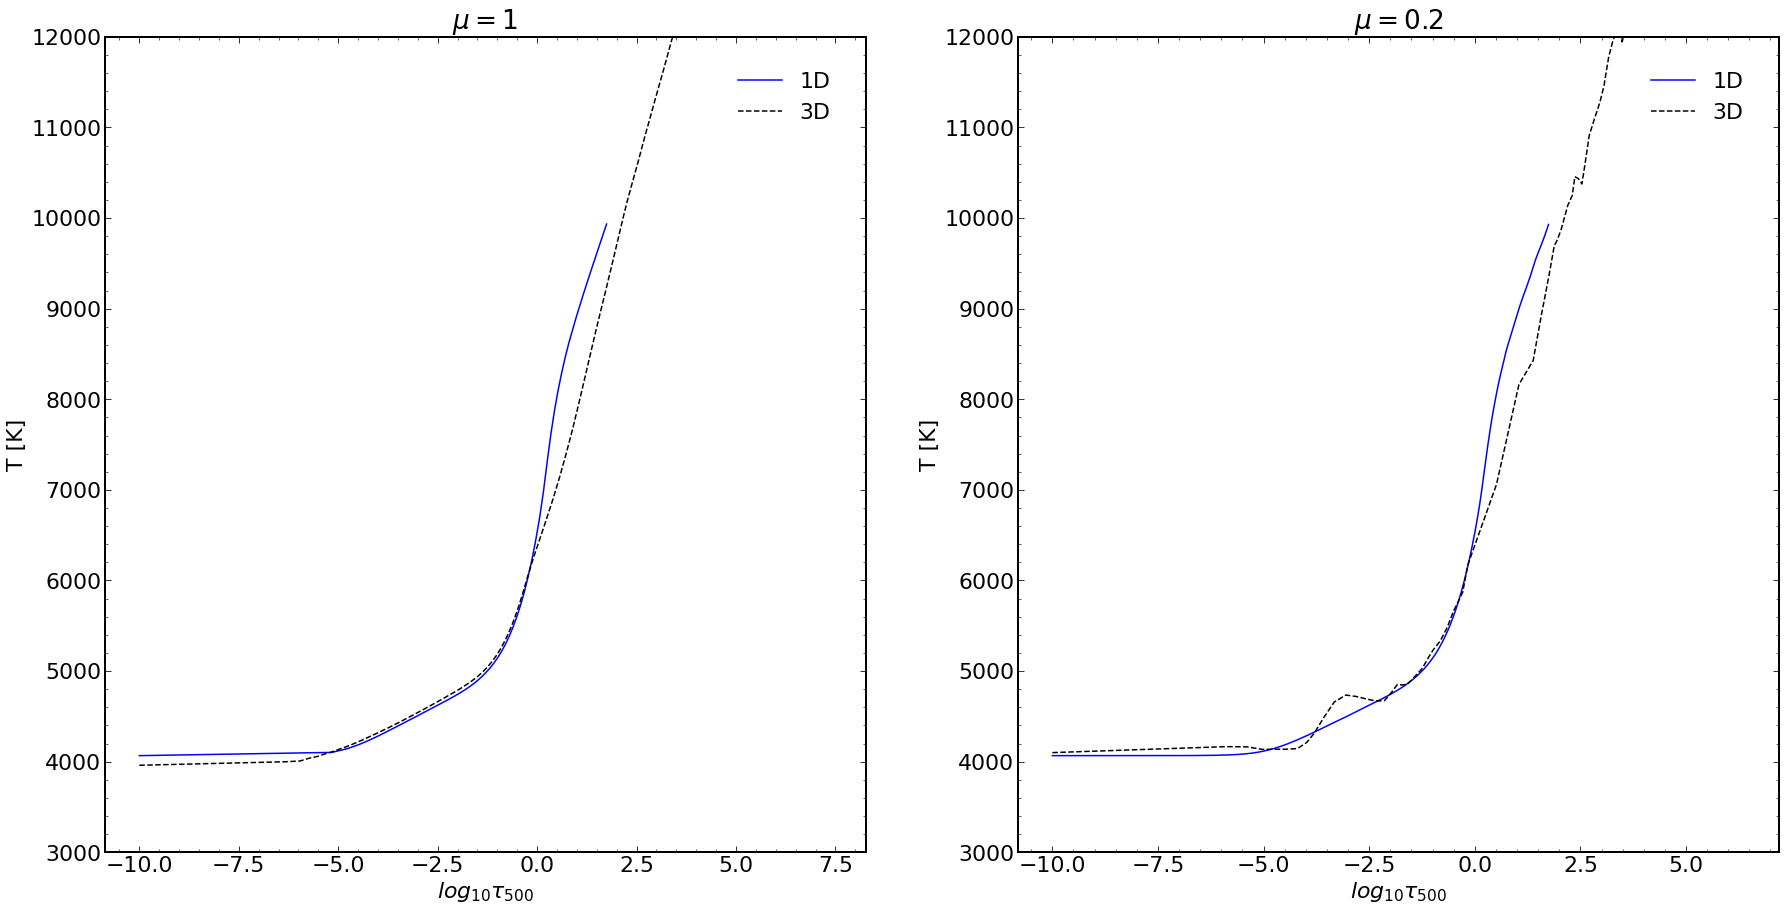

In [74]:
fig, ax = plt.subplots(1,2 , figsize=(30,15))
ax[0].plot(np.log10(od_hav_1D) ,temp_hav_1D, label='1D', color='b' , linestyle='-')
ax[0].plot(np.log10(od_hav_3D), temp_hav_3D,  label='3D', color='k' , linestyle='--')
ax[0].set_xlabel(r'$log_{10}\tau_{500}$')
ax[0].set_ylabel('T [K]')
ax[0].set_title('$\mu = 1$')
ax[0].set_ylim(3000,12000)

ax[0].legend()

ax[1].plot(np.log10(od_array_1D.ravel()), tt_array_1D.ravel(), label='1D', color='b' , linestyle='-')
ax[1].plot(np.log10(od_array_3D.ravel()), tt_array_3D.ravel(), label='3D', color='k' , linestyle='--')
ax[1].set_xlabel(r'$log_{10}\tau_{500}$')
ax[1].set_ylabel('T [K]')
ax[1].set_title('$\mu = 0.2$')
ax[1].set_ylim(3000,12000)
# ax[1].xticks(np.arange(min(x), max(x)+1, 1.0))



ax[1].legend()

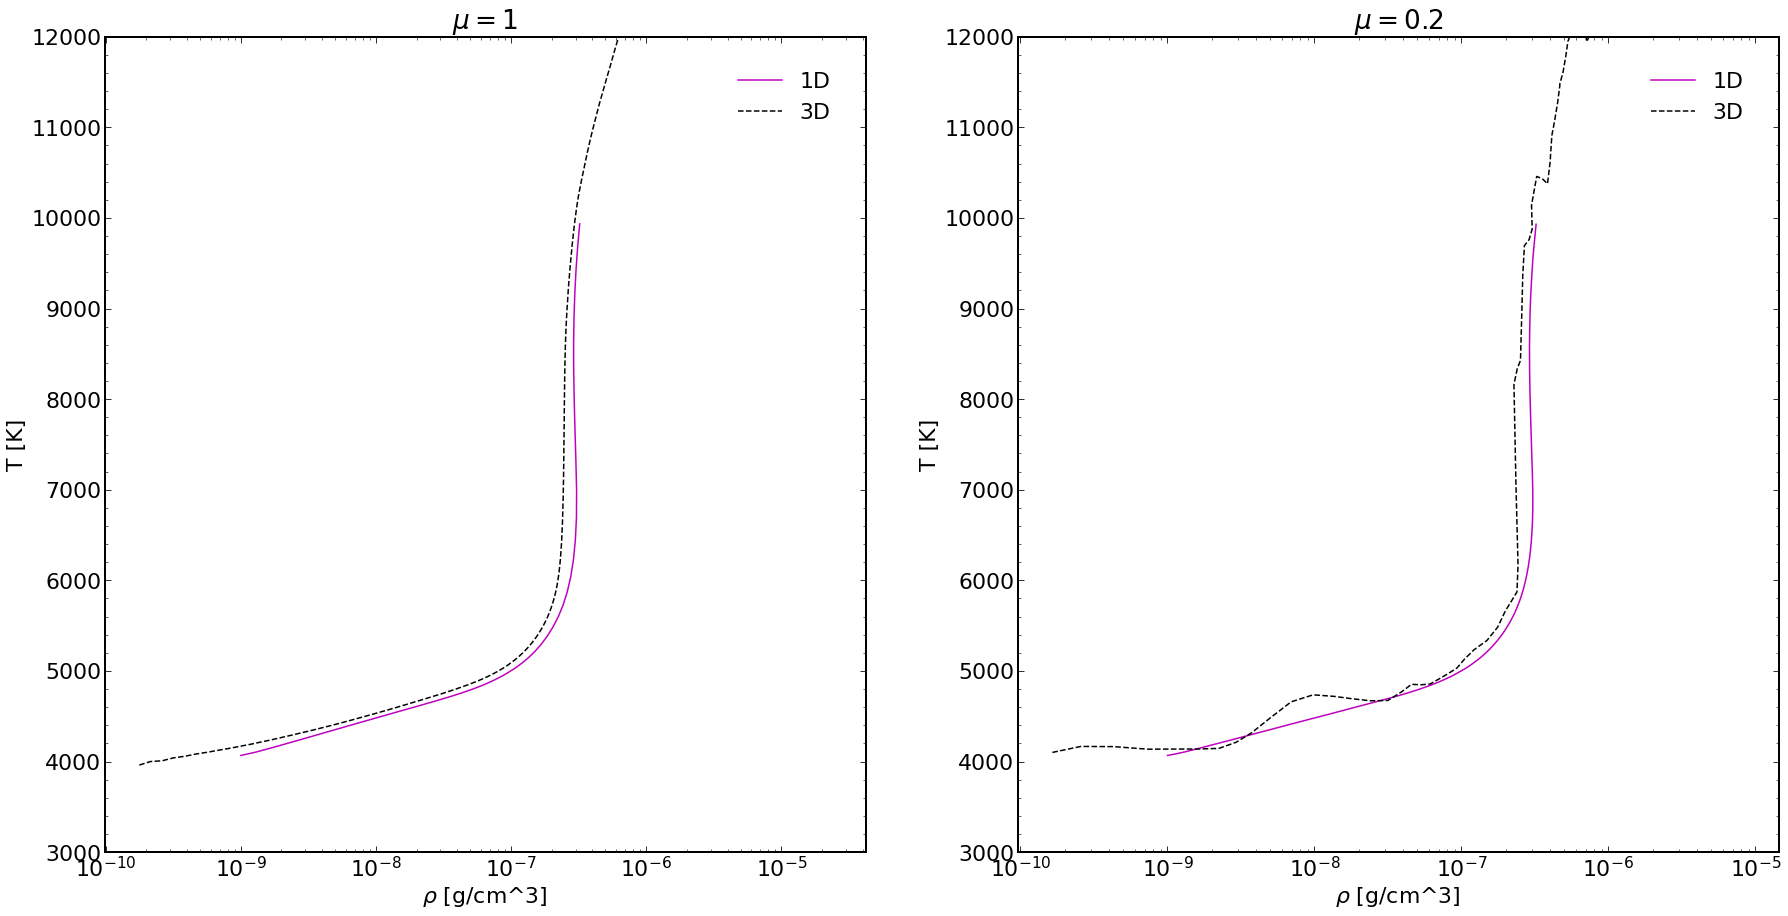

In [66]:
fig, ax = plt.subplots(1,2 , figsize=(30,15))
ax[0].semilogx(rho_hav_1D ,temp_hav_1D, label='1D', color='m' , linestyle='-')
ax[0].semilogx(rho_hav_3D ,temp_hav_3D,  label='3D', color='k' , linestyle='--')
ax[0].set_xlabel(r'$\rho$ [g/cm^3]')
ax[0].set_ylabel('T [K]')
ax[0].set_title('$\mu = 1$')
ax[0].set_ylim(3000,12000)
ax[0].legend()

ax[1].semilogx(rho_array_1D.ravel(), tt_array_1D.ravel(), label='1D', color='m' , linestyle='-')
ax[1].semilogx(rho_array_3D.ravel(),  tt_array_3D.ravel(), label='3D', color='k' , linestyle='--')
ax[1].set_xlabel(r'$\rho$ [g/cm^3]')
ax[1].set_ylabel('T [K]')
ax[1].set_title('$\mu = 0.2$')
ax[1].set_ylim(3000,12000)

ax[1].legend()